## <u>Name </u> : ADVAIT GURUNATH CHAVAN
## <u>Contact Number</u> : +91 70214 55852 
## <u>Mail ID</u> : advaitchavan135@gmail.com 
## <u>Forage British Airways Data Science Task 1</u> : Web scraping to gain company insights.

### 1. Scrapping the data

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 38
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | 4 Hours before takeoff we r...
1,✅ Trip Verified | I recently had a delay on B...
2,"Not Verified | Boarded on time, but it took a..."
3,"✅ Trip Verified | 5 days before the flight, w..."
4,Not Verified | \r\nWe traveled to Lisbon for ...


In [5]:
df.to_csv("BA_reviews.csv")

### 2. Exploring the downloaded dataset

### A. Importing the necessary modules

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.io as plio
import plotly.graph_objs as go
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from warnings import filterwarnings
filterwarnings(action='ignore')

In [56]:
data = pd.read_csv('BA_reviews.csv')

In [57]:
data

,Unnamed: 0,reviews
0,0,✅ Trip Verified | 4 Hours before takeoff we r...
1,1,✅ Trip Verified | I recently had a delay on B...
2,2,"Not Verified | Boarded on time, but it took a..."
3,3,"✅ Trip Verified | 5 days before the flight, w..."
4,4,Not Verified | \r\nWe traveled to Lisbon for ...
...,...,...
3696,3696,LHR-JFK-LAX-LHR. Check in was ok apart from be...
3697,3697,LHR to HAM. Purser addresses all club passenge...
3698,3698,My son who had worked for British Airways urge...
3699,3699,London City-New York JFK via Shannon on A318 b...


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3701 non-null   int64 
 1   reviews     3701 non-null   object
dtypes: int64(1), object(1)
memory usage: 58.0+ KB


In [66]:
# Split the text into two columns
data[['Verification Status', 'review']] = data['reviews'].str.split('|', 1, expand=True)

# Remove leading and trailing whitespaces
data['Verification Status'] = data['Verification Status'].str.strip()
data['review'] = data['review'].str.strip()

In [67]:
data.head()

,Unnamed: 0,reviews,Verification Status,review
0,0,✅ Trip Verified | 4 Hours before takeoff we r...,✅ Trip Verified,4 Hours before takeoff we received a Mail stat...
1,1,✅ Trip Verified | I recently had a delay on B...,✅ Trip Verified,I recently had a delay on British Airways from...
2,2,"Not Verified | Boarded on time, but it took a...",Not Verified,"Boarded on time, but it took ages to get to th..."
3,3,"✅ Trip Verified | 5 days before the flight, w...",✅ Trip Verified,"5 days before the flight, we were advised by B..."
4,4,Not Verified | \r\nWe traveled to Lisbon for ...,Not Verified,"We traveled to Lisbon for our dream vacation, ..."


In [68]:
data = data.drop('Unnamed: 0', axis=1)

In [122]:
data['Verification Status'].value_counts()

✅ Trip Verified                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

### B. Creating a separate dataset for verified trips and reviews

In [139]:
filtered_data = data[data['Verification Status'].isin(['✅ Trip Verified', ' ✅ Verified Review','✅ Verified Review'])]

In [140]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1923 entries, 0 to 2350
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   reviews              1923 non-null   object
 1   Verification Status  1923 non-null   object
 2   review               1923 non-null   object
dtypes: object(3)
memory usage: 60.1+ KB


In [141]:
filtered_data = filtered_data.drop('reviews', axis=1)

In [142]:
filtered_data['Verification Status'].value_counts()

✅ Trip Verified      1153
✅ Verified Review     770
Name: Verification Status, dtype: int64

In [143]:
filtered_data = filtered_data.applymap(lambda x: x.replace('✅ ', '') if pd.notna(x) else x)

In [144]:
filtered_data.head()

,Verification Status,review
0,Trip Verified,4 Hours before takeoff we received a Mail stat...
1,Trip Verified,I recently had a delay on British Airways from...
3,Trip Verified,"5 days before the flight, we were advised by B..."
5,Trip Verified,Booked a flight from Bucharest to Manchester w...
6,Trip Verified,Booked online months ago and the only hitch wa...


In [145]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1923 entries, 0 to 2350
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Verification Status  1923 non-null   object
 1   review               1923 non-null   object
dtypes: object(2)
memory usage: 45.1+ KB


### C. Using Wordclouds for sentiment analysis for Verified trips and reviews

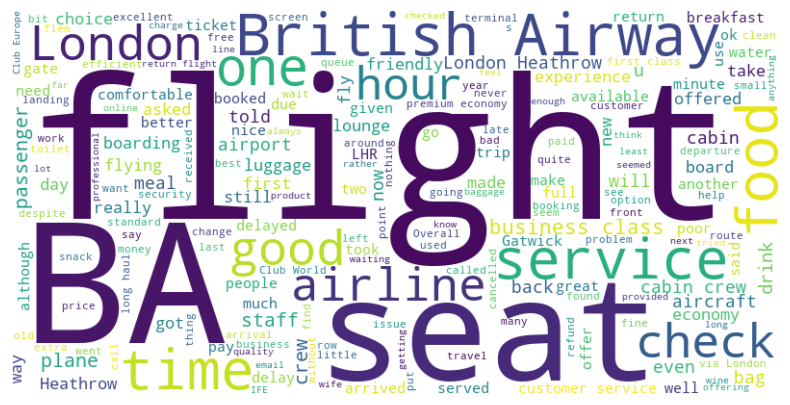

In [146]:
filtered_df = filtered_data

# Sentiment analysis using nltk
sia = SentimentIntensityAnalyzer()
filtered_df['Sentiment_Score'] = filtered_df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Create a WordCloud
all_reviews = ' '.join(filtered_df['review'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [147]:
# Analyze overall sentiment
average_sentiment = filtered_df['Sentiment_Score'].mean()
print(f'Average Sentiment: {average_sentiment:.2f}')

# Categorize sentiment
filtered_df['Sentiment_Label'] = filtered_df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else 'Neutral' if x == 0 else 'Negative')

# Analyze sentiment labels distribution using Plotly
sentiment_label_counts = filtered_df['Sentiment_Label'].value_counts().reset_index()
sentiment_label_counts.columns = ['Sentiment_Label', 'Count']

fig = px.bar(sentiment_label_counts, x='Sentiment_Label', y='Count', color='Sentiment_Label',
             labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Count'},
             color_discrete_map={'Positive': 'green', 'Neutral': 'yellow', 'Negative': 'red'},
             title='Sentiment Labels Distribution for verified trips')

# Add text annotations to each bar
for i, count in enumerate(sentiment_label_counts['Count']):
    fig.add_annotation(
        x=sentiment_label_counts['Sentiment_Label'][i],
        y=count + 23,  # Adjust the value for vertical positioning of the text
        text=str(count),
        showarrow=False,
        font=dict(color='black', size=12)
    )

fig.update_layout(xaxis_title='Sentiment Label', yaxis_title='Number of reviews')
fig.show()

Average Sentiment: 0.07


In [148]:
# Analyze sentiment labels distribution using Plotly
sentiment_label_counts = filtered_df['Sentiment_Label'].value_counts().reset_index()
sentiment_label_counts.columns = ['Sentiment_Label', 'Count']

fig = px.pie(sentiment_label_counts, values='Count', names='Sentiment_Label',
             title='Sentiment Labels Distribution for verified trips',
             color='Sentiment_Label',
             color_discrete_map={'Positive': 'green', 'Neutral': 'yellow', 'Negative': 'red'},
             labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Number of reviews'},
             hole=0.2  # Set the size of the center hole in the pie chart
             )

fig.show()

In [149]:
filtered_df

,Verification Status,review,Sentiment_Score,Sentiment_Label
0,Trip Verified,4 Hours before takeoff we received a Mail stat...,-0.9342,Negative
1,Trip Verified,I recently had a delay on British Airways from...,-0.8500,Negative
3,Trip Verified,"5 days before the flight, we were advised by B...",-0.8327,Negative
5,Trip Verified,Booked a flight from Bucharest to Manchester w...,-0.7269,Negative
6,Trip Verified,Booked online months ago and the only hitch wa...,0.5956,Positive
...,...,...,...,...
2345,Verified Review,Istanbul to London Heathrow with British Airwa...,0.9413,Positive
2346,Verified Review,"London Heathrow to Houston on British Airways,...",0.9472,Positive
2347,Verified Review,We have flown with British Airways over 100 ti...,-0.1796,Negative
2348,Verified Review,British Airways from Seattle to Johannesburg v...,0.9436,Positive


In [150]:
filtered_df.to_csv('Verfied Trips sentiment score and label.csv')

### D. Creating a separate dataset for unverified trips and reviews

In [123]:
unverified_filtered_data = data[data['Verification Status'].isin(['Not Verified','❎ Not Verified', '❎ Unverified'])]

In [124]:
unverified_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 2 to 1861
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   reviews              254 non-null    object
 1   Verification Status  254 non-null    object
 2   review               254 non-null    object
dtypes: object(3)
memory usage: 7.9+ KB


In [125]:
unverified_filtered_data = unverified_filtered_data.drop('reviews', axis=1)

In [126]:
unverified_filtered_data['Verification Status'].value_counts()

Not Verified      229
❎ Unverified       20
❎ Not Verified      5
Name: Verification Status, dtype: int64

In [127]:
unverified_filtered_data = unverified_filtered_data.applymap(lambda x: x.replace('❎ ', '') if pd.notna(x) else x)

In [128]:
unverified_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 2 to 1861
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Verification Status  254 non-null    object
 1   review               254 non-null    object
dtypes: object(2)
memory usage: 6.0+ KB


### E. Using Wordclouds for sentiment analysis for unverified trips and reviews

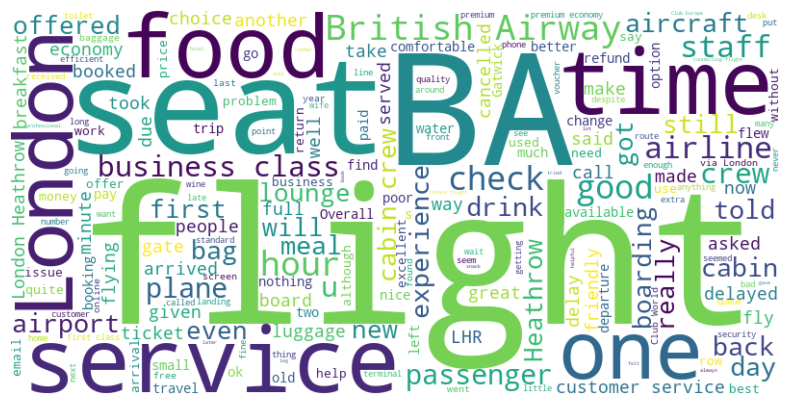

In [129]:
unverified_filtered_df = unverified_filtered_data

# Sentiment analysis using nltk
sia = SentimentIntensityAnalyzer()
unverified_filtered_df['Sentiment_Score'] = unverified_filtered_df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Create a WordCloud
all_reviews = ' '.join(filtered_df['review'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [131]:
# Analyze overall sentiment
average_sentiment = unverified_filtered_df['Sentiment_Score'].mean()
print(f'Average Sentiment: {average_sentiment:.2f}')

# Categorize sentiment
unverified_filtered_df['Sentiment_Label'] = unverified_filtered_df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else 'Neutral' if x == 0 else 'Negative')

# Analyze sentiment labels distribution using Plotly
sentiment_label_counts = unverified_filtered_df['Sentiment_Label'].value_counts().reset_index()
sentiment_label_counts.columns = ['Sentiment_Label', 'Count']

fig = px.bar(sentiment_label_counts, x='Sentiment_Label', y='Count', color='Sentiment_Label',
             labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Count'},
             color_discrete_map={'Positive': 'green', 'Neutral': 'yellow', 'Negative': 'red'},
             title='Sentiment Labels Distribution for unverified trips')

# Add text annotations to each bar
for i, count in enumerate(sentiment_label_counts['Count']):
    fig.add_annotation(
        x=sentiment_label_counts['Sentiment_Label'][i],
        y=count + 23,  # Adjust the value for vertical positioning of the text
        text=str(count),
        showarrow=False,
        font=dict(color='black', size=12)
    )

fig.update_layout(xaxis_title='Sentiment Label', yaxis_title='Number of reviews')
fig.show()

Average Sentiment: 0.04


In [132]:
# Analyze sentiment labels distribution using Plotly
sentiment_label_counts = unverified_filtered_df['Sentiment_Label'].value_counts().reset_index()
sentiment_label_counts.columns = ['Sentiment_Label', 'Count']

fig = px.pie(sentiment_label_counts, values='Count', names='Sentiment_Label',
             title='Sentiment Labels Distribution for unverified trips',
             color='Sentiment_Label',
             color_discrete_map={'Positive': 'green', 'Neutral': 'yellow', 'Negative': 'red'},
             labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Number of reviews'},
             hole=0.2  # Set the size of the center hole in the pie chart
             )

fig.show()

In [133]:
unverified_filtered_df.to_csv('Unverfied Trips sentiment score and label.csv')

### F. Creating a separate dataset for reviews that are niether 'verified trips and reviews' nor 'unverified trips and reviews'

In [165]:
# List of values to exclude
exclude_values = ['Not Verified', '❎ Not Verified', '❎ Unverified', '✅ Trip Verified', ' ✅ Verified Review','✅ Verified Review']

# Filter and sort the DataFrame
sorted_filtered_data = data[~data['Verification Status'].isin(exclude_values)].sort_values('Verification Status')


In [166]:
sorted_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524 entries, 3500 to 2200
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   reviews              1524 non-null   object
 1   Verification Status  1524 non-null   object
 2   review               1 non-null      object
dtypes: object(3)
memory usage: 47.6+ KB


In [167]:
sorted_filtered_data = sorted_filtered_data.drop('reviews', axis=1)

In [168]:
sorted_filtered_data['Verification Status'].value_counts()

Rome Fiumicino - LHR Jun 1st Economy Airbus 321. Great staff food offering poor I would have been happy to pay for a better option.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [169]:
sorted_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524 entries, 3500 to 2200
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Verification Status  1524 non-null   object
 1   review               1 non-null      object
dtypes: object(2)
memory usage: 35.7+ KB


In [170]:
non_null_rows = sorted_filtered_data[sorted_filtered_data['review'].notnull()]

# Print the row numbers
print("Row numbers with non-null values:")
print(non_null_rows.index.tolist())

Row numbers with non-null values:
[3322]


In [171]:
row_number = 3322
value_to_add = sorted_filtered_data.loc[row_number, 'review']

sorted_filtered_data.loc[row_number, 'Verification Status'] += value_to_add

In [172]:
sorted_filtered_data = sorted_filtered_data.drop('review', axis=1)

In [174]:
# Rename the 'Verification Status' column to 'review'
sorted_filtered_data = sorted_filtered_data.rename(columns={'Verification Status': 'review'})

### g. Using Wordclouds for sentiment analysis for reviews that are niether 'verified trips and reviews' nor 'unverified trips and reviews'¶

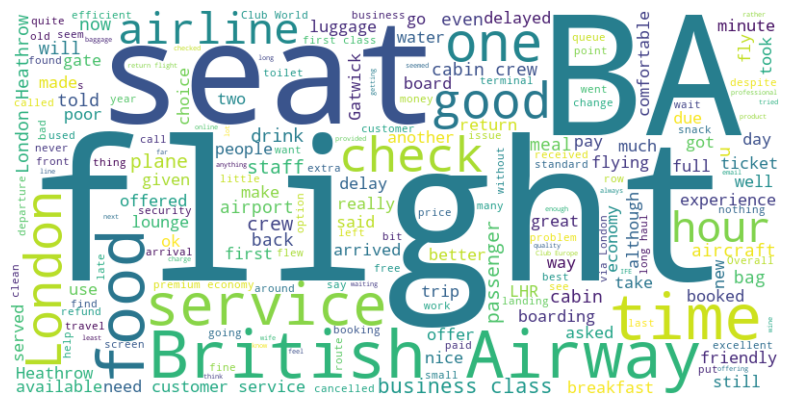

In [175]:
sorted_filtered_data_filtered_df = sorted_filtered_data

# Sentiment analysis using nltk
sia = SentimentIntensityAnalyzer()
sorted_filtered_data_filtered_df['Sentiment_Score'] = sorted_filtered_data_filtered_df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Create a WordCloud
all_reviews = ' '.join(filtered_df['review'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [177]:
# Analyze overall sentiment
average_sentiment = sorted_filtered_data_filtered_df['Sentiment_Score'].mean()
print(f'Average Sentiment: {average_sentiment:.2f}')

# Categorize sentiment
sorted_filtered_data_filtered_df['Sentiment_Label'] = sorted_filtered_data_filtered_df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else 'Neutral' if x == 0 else 'Negative')

# Analyze sentiment labels distribution using Plotly
sentiment_label_counts = sorted_filtered_data_filtered_df['Sentiment_Label'].value_counts().reset_index()
sentiment_label_counts.columns = ['Sentiment_Label', 'Count']

fig = px.bar(sentiment_label_counts, x='Sentiment_Label', y='Count', color='Sentiment_Label',
             labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Count'},
             color_discrete_map={'Positive': 'green', 'Neutral': 'yellow', 'Negative': 'red'},
             title='Sentiment Labels Distribution for neither verified nor unverified trips')

# Add text annotations to each bar
for i, count in enumerate(sentiment_label_counts['Count']):
    fig.add_annotation(
        x=sentiment_label_counts['Sentiment_Label'][i],
        y=count + 23,  # Adjust the value for vertical positioning of the text
        text=str(count),
        showarrow=False,
        font=dict(color='black', size=12)
    )

fig.update_layout(xaxis_title='Sentiment Label', yaxis_title='Number of reviews')
fig.show()

Average Sentiment: 0.32


In [178]:
# Analyze sentiment labels distribution using Plotly
sentiment_label_counts = sorted_filtered_data_filtered_df['Sentiment_Label'].value_counts().reset_index()
sentiment_label_counts.columns = ['Sentiment_Label', 'Count']

fig = px.pie(sentiment_label_counts, values='Count', names='Sentiment_Label',
             title='Sentiment Labels Distribution for neither verified nor unverified trips',
             color='Sentiment_Label',
             color_discrete_map={'Positive': 'green', 'Neutral': 'yellow', 'Negative': 'red'},
             labels={'Sentiment_Label': 'Sentiment Label', 'Count': 'Number of reviews'},
             hole=0.2  # Set the size of the center hole in the pie chart
             )

fig.show()

In [179]:
sorted_filtered_data_filtered_df.to_csv('Neither Verified nor Unverfied Trips and reviews.csv')